In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.4.1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
              'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

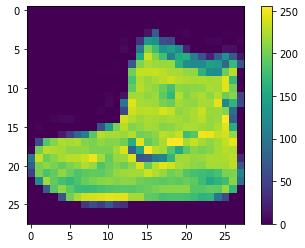

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

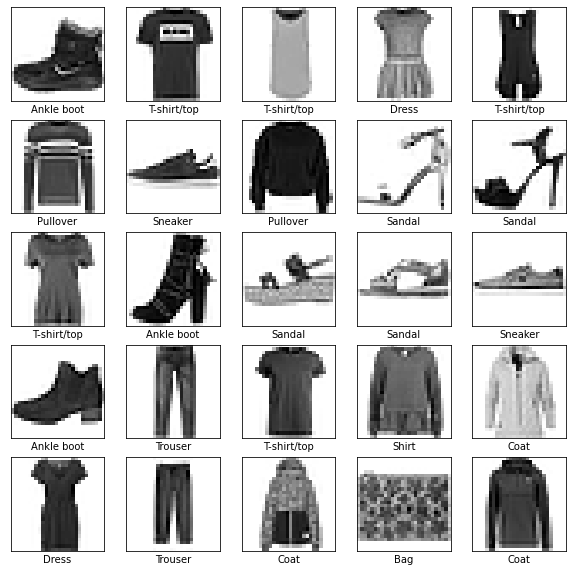

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6271 - accuracy: 0.7819
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3854 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2538 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2454 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 0s 903us/step - loss: 0.3452 - accuracy: 0.8812
Test Accuracy: 0.8812000155448914


In [27]:
predictions = model.predict(test_images)

In [29]:
predictions[0]  # These numbers describe the confidence that the model 
                # as in deciding what type of object the clothing is

array([8.6314742e-07, 3.8276632e-11, 3.5785575e-10, 1.7321035e-08,
       1.9855814e-07, 8.1577497e-03, 1.8736815e-06, 3.6838285e-03,
       4.9047446e-07, 9.8815501e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])  # Output 9 means that the program thinks it is a boot

9

In [31]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

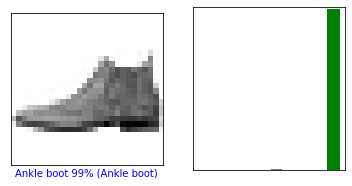

In [34]:
i = 0      # FIRST IMAGE
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

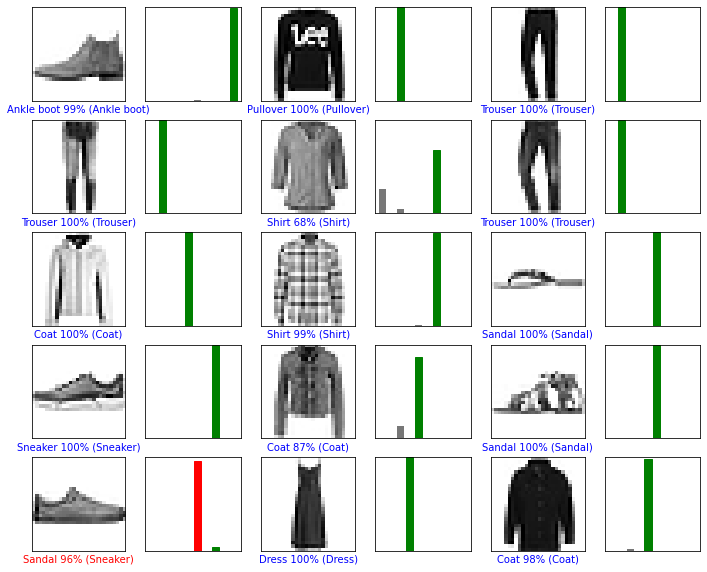

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show() # Notice error on image 12

In [44]:
img = test_images[0]

print(img.shape)

(28, 28)


In [45]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.6314810e-07 3.8276625e-11 3.5785436e-10 1.7321002e-08 1.9855756e-07
  8.1577562e-03 1.8736777e-06 3.6838281e-03 4.9047486e-07 9.8815489e-01]]


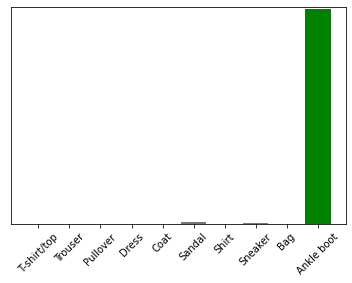

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)